결정 트리 분류기는 설명이 중요할 때 아주 유용한 모델이다

결정 알고리즘을 사용하면 트리의 루트에서 시작해서 정보 이득이 최대가 되는 특성으로 데이터를 나눈다

반복 과정을 통해 리프 노드가 순수해질 때까지 모든 자식 노드에서 이 분할 작업을 반복한다

일반적으로 트리의 최대 깊이를 제한하여 트리를 가지치기한다

이진 결정 트리에 사용되는 세 개의 불순도 지표 또는 분할 조건은 
##### 지니 불순도, 엔트로피 ,분류 오차 이다


In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [18]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5,ccp_alpha=0.01)
tree_model.fit(X_train, y_train)    

 

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)

[Text(0.3333333333333333, 0.9166666666666666, 'petal width <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.75, 'petal length <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'petal width <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.5, 0.4166666666666667, 'petal length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.6666666666666666, 0.25, 'petal width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.8333333333333334, 0.41666666666

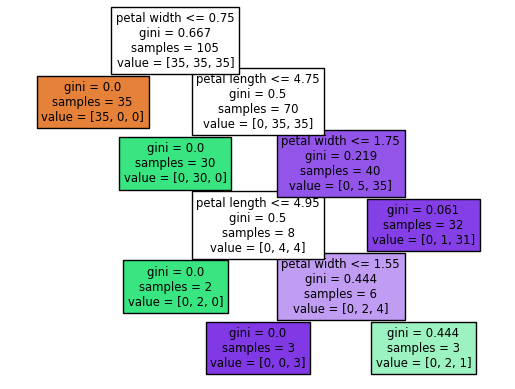

In [19]:
from sklearn import tree

featrue_names = ['petal length', 'petal width', 'sepal length', 'sepal width']

tree.plot_tree(tree_model, feature_names=featrue_names,filled=True)

### 랜덤 포레스트
개개인의 트리는 분산이 높은 문제가 있다 앙상블은 견고한 모델을 만들어 일반화 성능을 높이고 과대적합을 줄인다
랜덤포레스트는 결정 트리만큼 해석이 쉽지는 않지만 하이퍼파라미터 튜닝에 많은 노력을 기울일 필요가 없다는 것이 큰 장점이다
부트스트랩 : 중복을 허용하면서 랜덤하게 n개의 샘플을 선택한다

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators=25,  n_jobs=-1)
forest.fit(X_train, y_train)
# n_estimators=25 : 25개의 결정 트리를 사용하여 랜덤 포레스트 훈련

RandomForestClassifier(n_estimators=25, n_jobs=-1)